In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 6.1: The Multivariate Normal - Diagonal Covariance Case

## Objectives

+ To introduce the multivariate normal with diagonal covariance.

## The multivariate mormal - Diagonal covariance case

Consider the $N$-dimensional multivariate normal:
$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right),
$$
where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\sigma_i$ are positive numbers.
This is known as the multivariate normal with diagonal covariance.
All the components of the vector are independent.
Let's first visualize the joint PDF of this random vector in 2D.
We are going to plot its contours.

In [50]:
import scipy.stats as st
# The mean vector
mu = [0.0, 1.0]
# The variance of each component
sigma2 = [.1, 1.0]
# The covariance matrix of the multivariate normal
Sigma = np.diag(sigma2)
# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

In [51]:
# Here is how you can sample from this
X.rvs()

array([-0.17335904,  1.3839451 ])

In [52]:
# Here is how you can evaluate the PDF at a point
X.pdf([0.5, -1.0])

0.01951475330146199

In [53]:
# Now, let's do the contour
# We need a grid of x1 and x2 points. This takes three steps
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
X1, X2 = np.meshgrid(x1, x2)
# These are 64 x 64 matrices
print(X1.shape)

(64, 64)


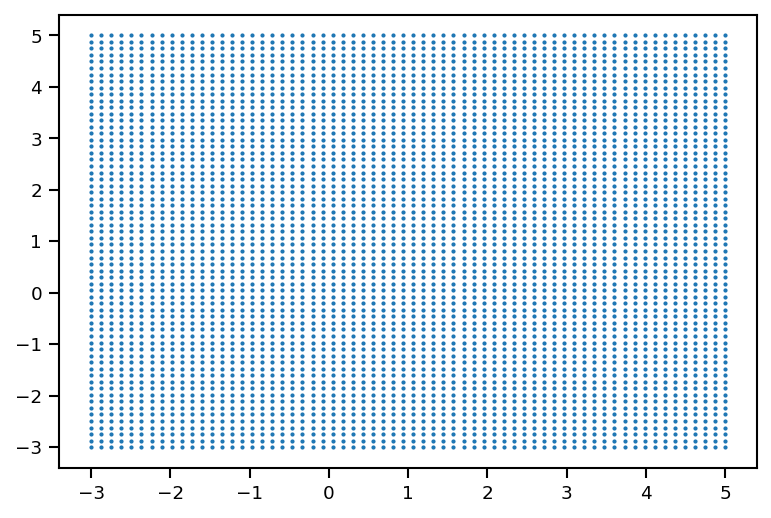

In [54]:
# And they give you these points in x1-x2 space:
fig, ax = plt.subplots(dpi=150)
ax.plot(X1.flatten(), X2.flatten(), '.', markersize=2)

In [55]:
# We are going to evaluate the PDF on all these locations.
# This is done as follows:
# First, create a 64^2 x 2 array of all the grid points by flattening X1 and X2 and then
# joining together their columns:
X_flat = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
print(X_flat.shape)

(4096, 2)


In [56]:
# Second, evaluate the PDF at all these points
z = X.pdf(X_flat)
print(z.shape)
print(z)

(4096,)
[4.83295321e-24 2.01211517e-22 7.12956827e-21 ... 2.06749708e-53
 4.60324824e-56 8.72276231e-59]


In [57]:
# Third, reshape z to 64 x 64
Z = z.reshape((64, 64))
print(Z.shape)

(64, 64)


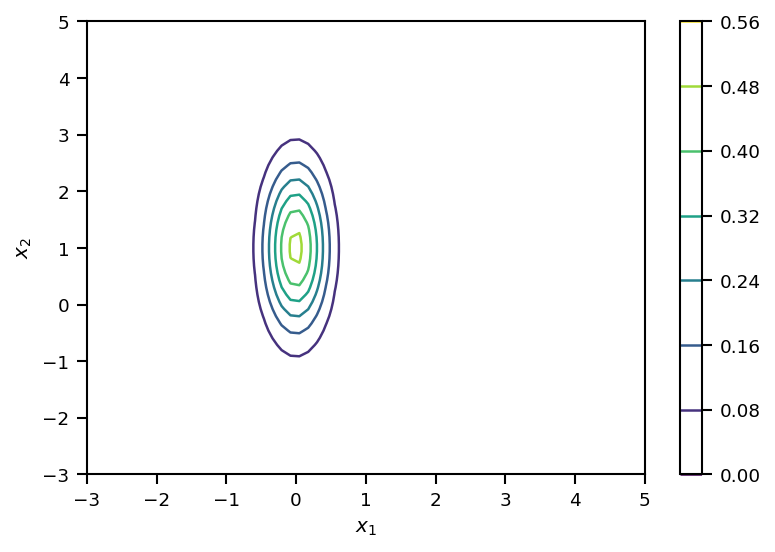

In [58]:
# Fourth, plot the contours
fig, ax = plt.subplots(dpi=150)
c = ax.contour(X1, X2, Z)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.colorbar(c)

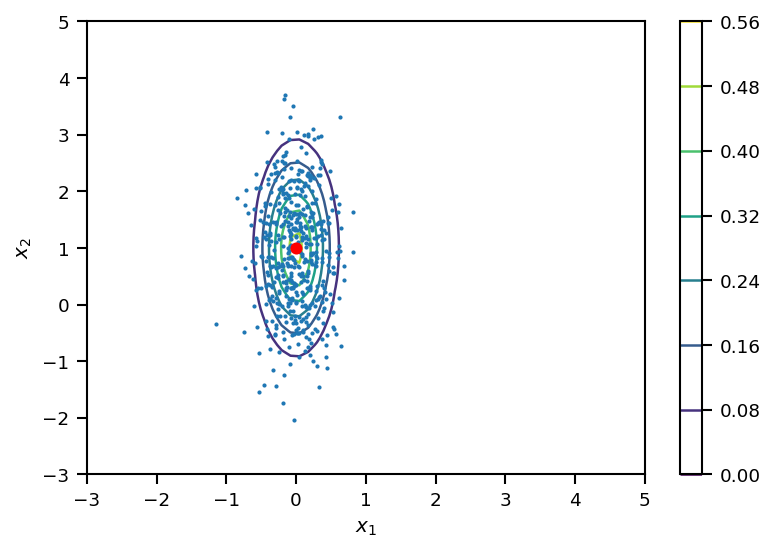

In [59]:
# Now, let's take some samples of X and add them in this figure
num_samples = 500
x_samples = X.rvs(size=num_samples)
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=2)
# Mark the mean in red as well
ax.plot(X.mean[0], X.mean[1], 'ro')
fig

## Questions

+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\sigma_1^2 = 0.1$ and $\sigma_2^2 = 1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\sigma_1^2 = 1$ and $\sigma_2^2 = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\sigma_1^2 = 1$ and $\sigma_2^2 = 0.01$. Observe how the contours of the PDF change.

## Sampling the multivariate normal with diagonal covariance using the standard normal

In the lecture we showed that if $\mathbf{Z}$ is an $N$-dimensional standard normal:
$$
\mathbf{Z} \sim N(0,\mathbf{I}),
$$
where $\mathbf{I}$ is the $N\times N$ unit matrix (all zeros except the diagonal which is all ones), then the random vector:
$$
\mathbf{X} = \boldsymbol{\mu} + \operatorname{diag}\left(\sigma_1, \dots,\sigma_N\right)\mathbf{Z},
$$
is a multivariate normal:
$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right).
$$
Let's verify this by creating samples of $\mathbf{X}$ using samples of $\mathbf{Z}$ and then plotting these samples together with the contours of $N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right)$.

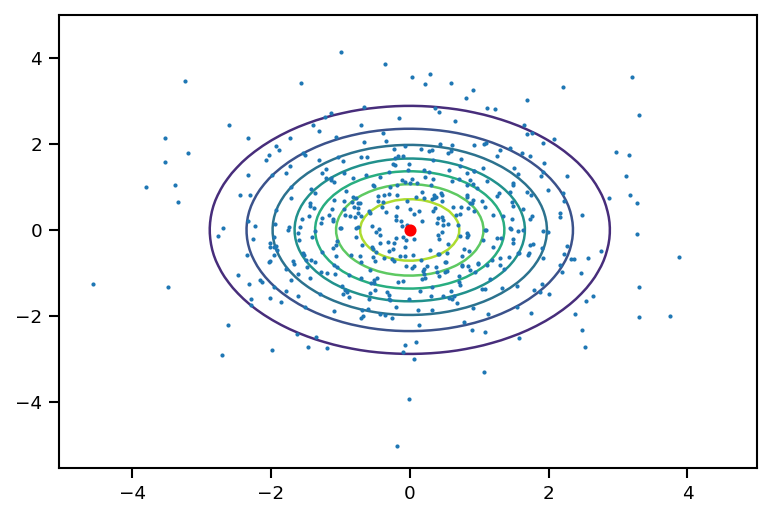

In [62]:
# The multivariate normal that you want to study:
# The mean vector
mu = [0.0, 0.0]
# The variance of each component
sigma2 = [2.0, 2.0]
# The covariance matrix of the multivariate normal
Sigma = np.diag(sigma2)
# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

# The number of samples you want to take:
num_samples = 500
# Here is how you can sample from Z:
z_samples = np.random.randn(num_samples, 2)
# Transforms these to samples of X 
# (2-vector + (N x 2)-matrix * (2 x 2)-matrix = 2-vector + (N x 2)-matrix)
# = (N x 2)-matrix
x_samples = mu + np.dot(z_samples, np.sqrt(Sigma)) # Please pay attention to the sqrt(Sigma)
# NOT just Sigma.

# Visualize everything
fig, ax = plt.subplots(dpi=150)
# The contours
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
X1, X2 = np.meshgrid(x1, x2)
# Flattened values of grid points
X_flat = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
# PDF values
pdf_X_flat = X.pdf(X_flat).reshape(X1.shape)
# Plot contours
c = ax.contour(X1, X2, pdf_X_flat)
# Plot the samples
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=2)
# Plot the mean
ax.plot(X.mean[0], X.mean[1], 'ro');

## Questions

+ Rerun the steps above changing $\boldsymbol{\mu}, \sigma_1^2$ and $\sigma_2^2$ and observe that you are always getting the correct samples.